##### **Import Packages**

In [1]:
# Install seaborn
%pip install seaborn

# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


##### **Load Tables (Spark)**

In [2]:
# Sales
from deltalake import DeltaTable, write_deltalake
table_path = 'abfss://Projeto_II@onelake.dfs.fabric.microsoft.com/Projeto_II_Gold_.Lakehouse/Tables/Projeto_II_Gold_/fact_sales' 
storage_options = {"bearer_token": notebookutils.credentials.getToken('storage'), "use_fabric_endpoint": "true"}
sales_spark = DeltaTable(table_path, storage_options=storage_options)

In [3]:
# Stores
from deltalake import DeltaTable, write_deltalake
table_path = 'abfss://Projeto_II@onelake.dfs.fabric.microsoft.com/Projeto_II_Gold_.Lakehouse/Tables/Projeto_II_Gold_/dim_stores' 
storage_options = {"bearer_token": notebookutils.credentials.getToken('storage'), "use_fabric_endpoint": "true"}
stores_spark = DeltaTable(table_path, storage_options=storage_options)

In [4]:
# Products
from deltalake import DeltaTable, write_deltalake
table_path = 'abfss://Projeto_II@onelake.dfs.fabric.microsoft.com/Projeto_II_Gold_.Lakehouse/Tables/Projeto_II_Gold_/dim_product' 
storage_options = {"bearer_token": notebookutils.credentials.getToken('storage'), "use_fabric_endpoint": "true"}
products_spark = DeltaTable(table_path, storage_options=storage_options)

In [5]:
# Products
from deltalake import DeltaTable, write_deltalake
table_path = 'abfss://Projeto_II@onelake.dfs.fabric.microsoft.com/Projeto_II_Gold_.Lakehouse/Tables/Projeto_II_Gold_/dim_product' 
storage_options = {"bearer_token": notebookutils.credentials.getToken('storage'), "use_fabric_endpoint": "true"}
products_spark = DeltaTable(table_path, storage_options=storage_options)

In [6]:
# Date
from deltalake import DeltaTable, write_deltalake
table_path = 'abfss://Projeto_II@onelake.dfs.fabric.microsoft.com/Projeto_II_Gold_.Lakehouse/Tables/Projeto_II_Gold_/dim_date' 
storage_options = {"bearer_token": notebookutils.credentials.getToken('storage'), "use_fabric_endpoint": "true"}
date_spark = DeltaTable(table_path, storage_options=storage_options)

##### **Set up Visualization**

In [7]:
# Set up visualization 
sns.set(font_scale = 1.4)
sns.set_style("ticks")
sns.set_palette("winter")

blue_color = "#0000FF"
insight_color = "#00FFFF"

##### **Convert to Pandas**

In [8]:
sales = sales_spark.to_pandas()
products = products_spark.to_pandas()
stores = stores_spark.to_pandas()
date = date_spark.to_pandas()

In [9]:
# Inspect
sales.info()
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886058 entries, 0 to 8886057
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   date_id                int32  
 1   store_id               object 
 2   product_id             object 
 3   sales                  float64
 4   revenue                float64
 5   stock                  float64
 6   price                  float64
 7   promo_type_1           object 
 8   promo_bin_1            object 
 9   promo_type_2           object 
 10  promo_bin_2            object 
 11  promo_discount_2       float64
 12  promo_discount_type_2  object 
dtypes: float64(5), int32(1), object(7)
memory usage: 847.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   store_id      63 non-null     object
 1   storetype_id  63 non-null     object
 2   store_si

##### **Join for Stores Revenue Analysis**

The goal is to define the Proof of Concept through a business perspective: revenue and sales.

In [10]:
# Join
store_analysis = sales.merge(stores, how = "left", on = "store_id")

In [11]:
# Inspect
store_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886058 entries, 0 to 8886057
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   date_id                int32  
 1   store_id               object 
 2   product_id             object 
 3   sales                  float64
 4   revenue                float64
 5   stock                  float64
 6   price                  float64
 7   promo_type_1           object 
 8   promo_bin_1            object 
 9   promo_type_2           object 
 10  promo_bin_2            object 
 11  promo_discount_2       float64
 12  promo_discount_type_2  object 
 13  storetype_id           object 
 14  store_size             int32  
 15  city_name              object 
dtypes: float64(5), int32(2), object(9)
memory usage: 1016.9+ MB


##### **Analysis by Store Type**

As we need to define a group of stores for the PoC, we decided to analyse the store type. 

In [12]:
# Store type
print(store_analysis["storetype_id"].unique())

['ST04' 'ST03' 'ST02' 'ST01']


storetype_id
ST04    63.492063
ST03    31.746032
ST01     3.174603
ST02     1.587302
Name: store_id, dtype: float64


/tmp/ipykernel_40/2361807961.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(
/tmp/ipykernel_40/2361807961.py:8: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(


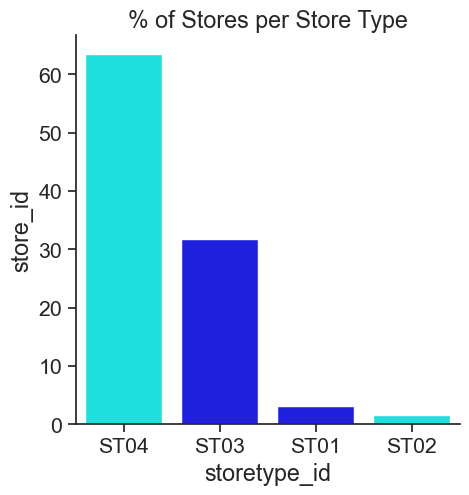

In [13]:
# Nº of stores per type
st_type = (store_analysis.groupby(
    "storetype_id")["store_id"].nunique() / store_analysis[
        "store_id"].nunique() * 100).sort_values(ascending = False)
print(st_type)

# Visualization
sns.catplot(
    data = st_type,
    palette = [insight_color] + ['blue'] * (len(st_type) - 2),
    kind = "bar"
)
plt.title("% of Stores per Store Type")
plt.show()

In [14]:
# Sales and revenue
print(store_analysis.groupby("storetype_id")[["sales", "revenue"]].mean().round(2))

              sales  revenue
storetype_id                
ST01           0.94     4.66
ST02           0.81     5.61
ST03           0.39     1.27
ST04           0.41     2.04


/tmp/ipykernel_40/3206616435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


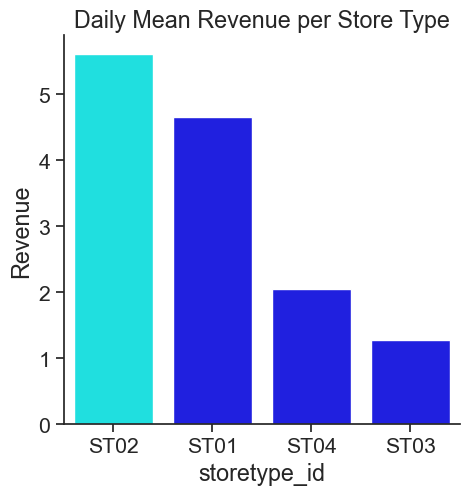

In [15]:
# Sales and revenue
sales_perc =store_analysis.groupby("storetype_id")["revenue"].mean().sort_values(ascending = False).reset_index(name = "Revenue")

sns.catplot(
    data = sales_perc,
    x = "storetype_id",
    y = "Revenue",
    palette = [insight_color] + ['blue'] * (len(st_type) - 1),
    kind = "bar"
)
plt.title("Daily Mean Revenue per Store Type")
plt.show()


###### **Notes**

- Most stores are type ST03 and ST04 (32% and 64%, respectively). 
- However, store types ST01 and ST02 present the highest mean of sales and revenue. 
    - Low values due to the significant nº of missing values / 0.
- Therefore, we consider that is relevant to have all types in consideration in the PoC and have decided to have 1 store per type. 

##### **Analysis by City**

In [16]:
store_analysis.groupby("city_name")[[
    "sales", "revenue"]].mean().sort_values(
        "sales", ascending = False).round(2)

,sales,revenue
city_name,,
Bursa,0.59,2.97
Istanbul,0.59,2.88
Ankara,0.48,2.39
Adana,0.44,2.04
Eskisehir,0.40,2.11
Kahramanmaras,0.39,1.93
Van,0.33,1.65
Konya,0.33,1.36
Diyarbakir,0.32,1.47


In [17]:
store_analysis[store_analysis["city_name"].isin(["Istanbul", "Bursa"])].groupby(["city_name", "storetype_id"])[
    "store_id"].nunique()


city_name  storetype_id
Bursa      ST01             1
Istanbul   ST01             1
           ST02             1
           ST03            13
           ST04            17
Name: store_id, dtype: int64

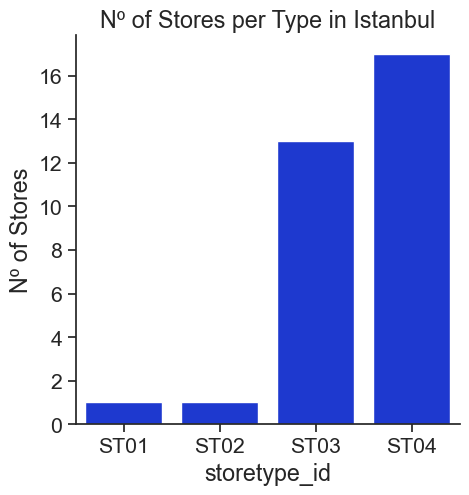

In [18]:
# Nº of store types per city
n_stores_ist_burs = store_analysis[store_analysis["city_name"] == "Istanbul"].groupby("storetype_id")["store_id"].nunique()

sns.catplot(
    data = n_stores_ist_burs,
    kind = "bar"
)
plt.title("Nº of Stores per Type in Istanbul")
plt.ylabel("Nº of Stores")
plt.show()

##### **Notes**

- Bursa and Istanbul are the cities with higher revenue and sales.
- However, Bursa has only 1 store, but Istanbul has at least 1 store per type. 
    - Therefore, we will consider only Istanbul for our scope.  

##### **Select the store per Type in Istanbul**

In [19]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date_id            1033 non-null   int32 
 1   full_date          1033 non-null   object
 2   year               1033 non-null   int32 
 3   month              1033 non-null   int32 
 4   day                1033 non-null   int32 
 5   day_of_week_num    1033 non-null   int32 
 6   day_of_week_short  1033 non-null   object
 7   day_of_week_long   1033 non-null   object
 8   week_of_year       1033 non-null   int32 
 9   quarter            1033 non-null   int32 
 10  month_name_long    1033 non-null   object
 11  month_name_short   1033 non-null   object
 12  is_weekend         1033 non-null   bool  
 13  is_holiday         1033 non-null   bool  
dtypes: bool(2), int32(7), object(5)
memory usage: 70.7+ KB


In [20]:
# Select Stores in Istanbul
store_analysis_is = store_analysis[store_analysis["city_name"] == 'Istanbul']

# Merge with Date
store_analysis_is = store_analysis_is.merge(
    date[["date_id", "full_date"]], 
    how = "left",
    on = "date_id")

# Data type
store_analysis_is["full_date"] = pd.to_datetime(store_analysis_is["full_date"])

# Inspect
store_analysis_is.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268523 entries, 0 to 4268522
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   date_id                int32         
 1   store_id               object        
 2   product_id             object        
 3   sales                  float64       
 4   revenue                float64       
 5   stock                  float64       
 6   price                  float64       
 7   promo_type_1           object        
 8   promo_bin_1            object        
 9   promo_type_2           object        
 10  promo_bin_2            object        
 11  promo_discount_2       float64       
 12  promo_discount_type_2  object        
 13  storetype_id           object        
 14  store_size             int32         
 15  city_name              object        
 16  full_date              datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int32(2), object(9)
memory usag

###### **ST01**

In [21]:
store_type_id = "ST01"

In [22]:
# Store Type ST01
ist_storetype = store_analysis_is[store_analysis_is["storetype_id"] == store_type_id]

# Info
ist_storetype.info()
print(ist_storetype.head())

# Nº of stores
print(ist_storetype["store_id"].nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 325409 entries, 2664885 to 4267382
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date_id                325409 non-null  int32         
 1   store_id               325409 non-null  object        
 2   product_id             325409 non-null  object        
 3   sales                  325409 non-null  float64       
 4   revenue                325409 non-null  float64       
 5   stock                  325409 non-null  float64       
 6   price                  325409 non-null  float64       
 7   promo_type_1           325409 non-null  object        
 8   promo_bin_1            325409 non-null  object        
 9   promo_type_2           325409 non-null  object        
 10  promo_bin_2            325409 non-null  object        
 11  promo_discount_2       325409 non-null  float64       
 12  promo_discount_type_2  325409 non-null  ob

In [23]:
# Aggregate revenue and sales of all products per week
ist_storetype_sum = ist_storetype.groupby("full_date").agg(
        sum_sales = ("sales", "sum"),
        sum_revenue = ("revenue", "sum")).reset_index()

# Inspect
print(ist_storetype_sum["full_date"].describe())
print(f"Nº of weeks without sales: {(ist_storetype_sum['sum_sales'] == 0).sum()}")
print(f"Nº of weeks without revenue: {(ist_storetype_sum['sum_revenue'] == 0).sum()}")
print(f"Proportion of weeks without neither sales nor revenue: {(ist_storetype_sum['sum_revenue'] == 0).sum() / len(ist_storetype_sum)}")

count                   1033
mean     2018-06-02 00:00:00
min      2017-01-02 00:00:00
25%      2017-09-17 00:00:00
50%      2018-06-02 00:00:00
75%      2019-02-15 00:00:00
max      2019-10-31 00:00:00
Name: full_date, dtype: object
Nº of weeks without sales: 33
Nº of weeks without revenue: 33
Proportion of weeks without neither sales nor revenue: 0.031945788964181994


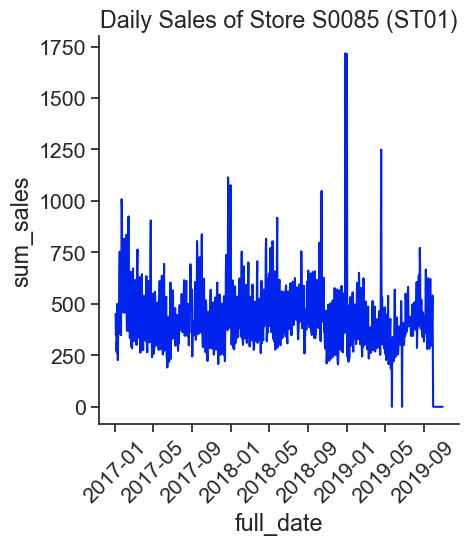

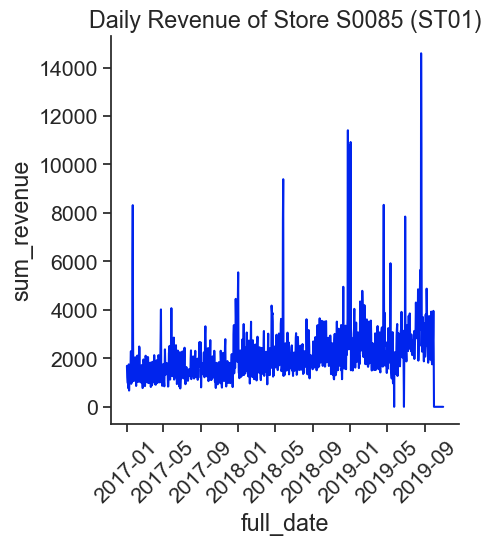

In [24]:
# Visualization
sns.relplot(
    data = ist_storetype_sum, 
    x = "full_date",
    y = "sum_sales",
    kind = "line")
plt.xticks(rotation = 45)
plt.title("Daily Sales of Store S0085 (ST01)")
plt.show()

sns.relplot(
    data = ist_storetype_sum, 
    x = "full_date",
    y = "sum_revenue",
    kind = "line")
plt.xticks(rotation = 45)
plt.title("Daily Revenue of Store S0085 (ST01)")
plt.show()


###### **ST02**

In [25]:
store_type_id = "ST02"

In [26]:
# Store Type ST02
ist_storetype = store_analysis_is[store_analysis_is["storetype_id"] == store_type_id]

# Info
ist_storetype.info()
print(ist_storetype.head())

# Nº of stores
print(ist_storetype["store_id"].nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 173732 entries, 1339841 to 4267643
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date_id                173732 non-null  int32         
 1   store_id               173732 non-null  object        
 2   product_id             173732 non-null  object        
 3   sales                  173732 non-null  float64       
 4   revenue                173732 non-null  float64       
 5   stock                  173732 non-null  float64       
 6   price                  173732 non-null  float64       
 7   promo_type_1           173732 non-null  object        
 8   promo_bin_1            173732 non-null  object        
 9   promo_type_2           173732 non-null  object        
 10  promo_bin_2            173732 non-null  object        
 11  promo_discount_2       173732 non-null  float64       
 12  promo_discount_type_2  173732 non-null  ob

In [27]:
# Aggregate revenue and sales of all products per week
ist_storetype_sum = ist_storetype.groupby("full_date").agg(
        sum_sales = ("sales", "sum"),
        sum_revenue = ("revenue", "sum")).reset_index()

# Inspect
print(ist_storetype_sum["full_date"].describe())
print(f"Nº of weeks without sales: {(ist_storetype_sum['sum_sales'] == 0).sum()}")
print(f"Nº of weeks without revenue: {(ist_storetype_sum['sum_revenue'] == 0).sum()}")
print(f"Proportion of weeks without neither sales nor revenue: {(ist_storetype_sum['sum_revenue'] == 0).sum() / len(ist_storetype_sum)}")

count                   1033
mean     2018-06-02 00:00:00
min      2017-01-02 00:00:00
25%      2017-09-17 00:00:00
50%      2018-06-02 00:00:00
75%      2019-02-15 00:00:00
max      2019-10-31 00:00:00
Name: full_date, dtype: object
Nº of weeks without sales: 32
Nº of weeks without revenue: 32
Proportion of weeks without neither sales nor revenue: 0.030977734753146177


/tmp/ipykernel_40/882297859.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(


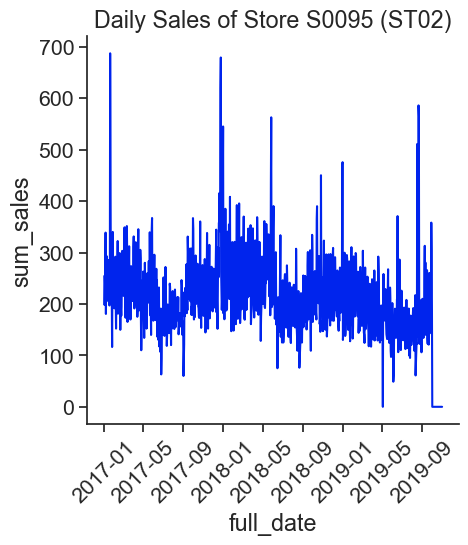

/tmp/ipykernel_40/882297859.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(


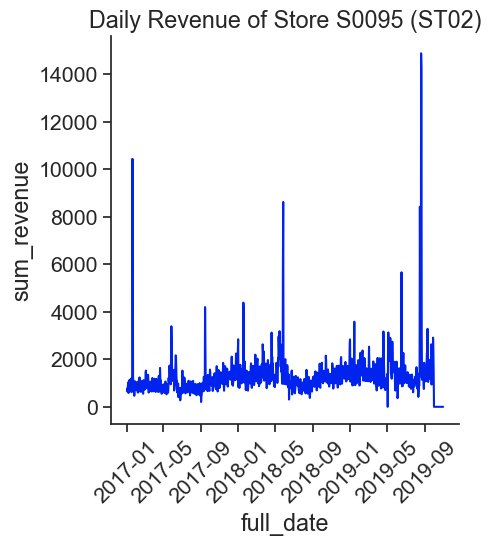

In [47]:
# Visualization
sns.relplot(
    data = ist_storetype_sum, 
    x = "full_date",
    y = "sum_sales",
    kind = "line")
plt.xticks(rotation = 45)
plt.title("Daily Sales of Store S0095 (ST02)")
plt.show()

sns.relplot(
    data = ist_storetype_sum, 
    x = "full_date",
    y = "sum_revenue",
    kind = "line")
plt.xticks(rotation = 45)
plt.title("Daily Revenue of Store S0095 (ST02)")
plt.show()


###### **ST03**

In [29]:
store_type_id = "ST03"

In [30]:
# Store Type ST03
ist_storetype = store_analysis_is[store_analysis_is["storetype_id"] == store_type_id]

# Info
ist_storetype.info()
print(ist_storetype.head())

# Nº of stores
print(ist_storetype["store_id"].nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 749588 entries, 0 to 4268522
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date_id                749588 non-null  int32         
 1   store_id               749588 non-null  object        
 2   product_id             749588 non-null  object        
 3   sales                  749588 non-null  float64       
 4   revenue                749588 non-null  float64       
 5   stock                  749588 non-null  float64       
 6   price                  749588 non-null  float64       
 7   promo_type_1           749588 non-null  object        
 8   promo_bin_1            749588 non-null  object        
 9   promo_type_2           749588 non-null  object        
 10  promo_bin_2            749588 non-null  object        
 11  promo_discount_2       749588 non-null  float64       
 12  promo_discount_type_2  749588 non-null  object  

In [31]:
# Aggregate revenue and sales of all products per week
ist_storetype_sum = ist_storetype.groupby(["full_date", "store_id"]).agg(
        sum_sales = ("sales", "sum"),
        sum_revenue = ("revenue", "sum")).reset_index()

# As there more more than 1 store, group by revenue and sales for analysis 
ist_storetype_sum_storeid = ist_storetype_sum.groupby("store_id")[[
    "sum_sales", "sum_revenue"]].mean().sort_values([
        "sum_sales", "sum_revenue"], ascending = False)
print(ist_storetype_sum_storeid.round(2))

          sum_sales  sum_revenue
store_id                        
S0080         83.41       197.99
S0014         34.27       138.54
S0003         34.04       122.93
S0076         32.68       118.17
S0016         28.24        86.96
S0059         23.77        99.22
S0039         20.27        75.40
S0007         20.04        99.67
S0099         19.42        60.78
S0077         18.94        59.96
S0143         14.67        52.96
S0120         13.05        49.13
S0089         12.11        44.75


In [32]:
# Define Top 3
ist_storetype_sum_storeid_top3 = ist_storetype_sum_storeid.head(3).index.tolist()
print(ist_storetype_sum_storeid_top3)

ist_storetype_sum_top3 = ist_storetype_sum[ist_storetype_sum[
    "store_id"].isin(ist_storetype_sum_storeid_top3)]

['S0080', 'S0014', 'S0003']


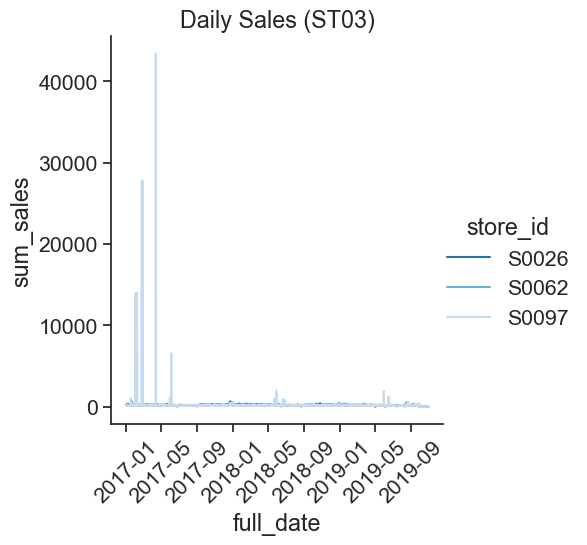

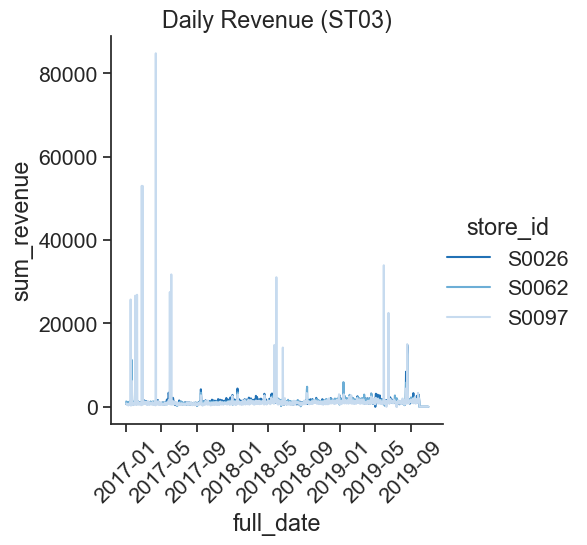

In [46]:
# Visualization
sns.relplot(
    data = ist_storetype_sum_top3, 
    x = "full_date",
    y = "sum_sales",
    hue = "store_id",
    palette = "Blues_r",
    kind = "line")
plt.xticks(rotation = 45)
plt.title("Daily Sales (ST03)")
plt.show()

sns.relplot(
    data = ist_storetype_sum_top3, 
    x = "full_date",
    y = "sum_revenue",
    hue = "store_id",
    palette = "Blues_r",
    kind = "line")
plt.xticks(rotation = 45)
plt.title("Daily Revenue (ST03)")
plt.show()


In [34]:
# Select the store
ist_storetype_sum = ist_storetype_sum[ist_storetype_sum["store_id"] == "S0080"]

# Inspect
print(ist_storetype_sum["full_date"].describe())
print(f"Nº of weeks without sales: {(ist_storetype_sum['sum_sales'] == 0).sum()}")
print(f"Nº of weeks without revenue: {(ist_storetype_sum['sum_revenue'] == 0).sum()}")
print(f"Proportion of weeks without neither sales nor revenue: {(ist_storetype_sum['sum_revenue'] == 0).sum() / len(ist_storetype_sum)}")

count                   1033
mean     2018-06-02 00:00:00
min      2017-01-02 00:00:00
25%      2017-09-17 00:00:00
50%      2018-06-02 00:00:00
75%      2019-02-15 00:00:00
max      2019-10-31 00:00:00
Name: full_date, dtype: object
Nº of weeks without sales: 32
Nº of weeks without revenue: 32
Proportion of weeks without neither sales nor revenue: 0.030977734753146177


###### **ST04**

In [35]:
store_type_id = "ST04"

In [36]:
# Store Type ST04
ist_storetype = store_analysis_is[store_analysis_is["storetype_id"] == store_type_id]

# Info
ist_storetype.info()
print(ist_storetype.head())

# Nº of stores
print(ist_storetype["store_id"].nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 3019794 entries, 552 to 4268453
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   date_id                int32         
 1   store_id               object        
 2   product_id             object        
 3   sales                  float64       
 4   revenue                float64       
 5   stock                  float64       
 6   price                  float64       
 7   promo_type_1           object        
 8   promo_bin_1            object        
 9   promo_type_2           object        
 10  promo_bin_2            object        
 11  promo_discount_2       float64       
 12  promo_discount_type_2  object        
 13  storetype_id           object        
 14  store_size             int32         
 15  city_name              object        
 16  full_date              datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int32(2), object(9)
memory usage: 

In [37]:
# Aggregate revenue and sales of all products per week
ist_storetype_sum = ist_storetype.groupby(["full_date", "store_id"]).agg(
        sum_sales = ("sales", "sum"),
        sum_revenue = ("revenue", "sum")).reset_index()

# As there more more than 1 store, group by revenue and sales for analysis 
ist_storetype_sum_storeid = ist_storetype_sum.groupby("store_id")[[
    "sum_sales", "sum_revenue"]].mean().sort_values([
        "sum_sales", "sum_revenue"], ascending = False)
print(ist_storetype_sum_storeid)

           sum_sales  sum_revenue
store_id                         
S0097     307.492990  1400.387737
S0026     205.631950  1225.049274
S0062     195.883520  1215.269245
S0020     184.327450   975.997812
S0072      78.726433   304.796202
S0126      73.761821   401.167067
S0015      72.678051   340.733320
S0010      69.489042   336.369216
S0071      54.164473   241.067793
S0058      53.354221   223.094327
S0022      51.271438   251.909952
S0055      46.719976   185.288635
S0050      45.991965   237.291646
S0067      39.948804   214.684753
S0052      37.132711   160.057812
S0107      35.496413   151.866389
S0073      30.823437   127.682827


In [38]:
# Define Top 3
ist_storetype_sum_storeid_top3 = ist_storetype_sum_storeid.head(3).index.tolist()
print(ist_storetype_sum_storeid_top3)

ist_storetype_sum_top3 = ist_storetype_sum[ist_storetype_sum[
    "store_id"].isin(ist_storetype_sum_storeid_top3)]

['S0097', 'S0026', 'S0062']


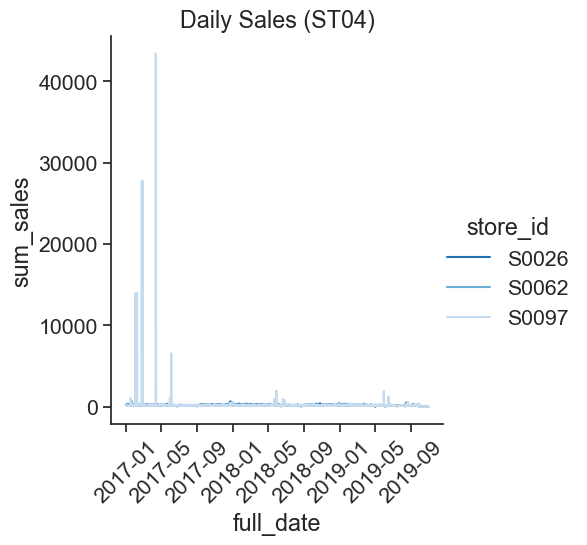

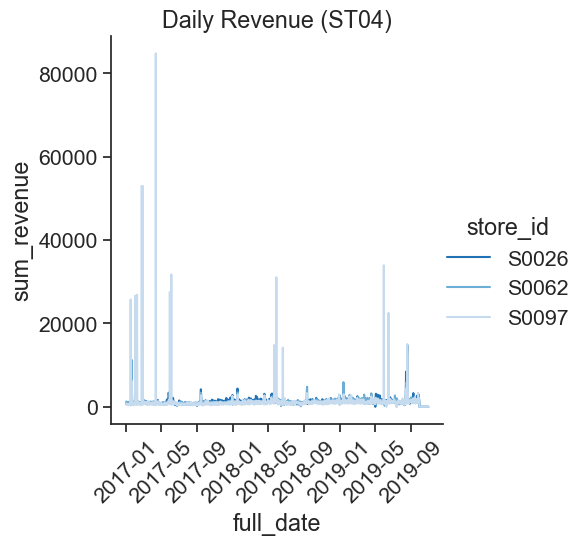

In [44]:
# Visualization
sns.relplot(
    data = ist_storetype_sum_top3, 
    x = "full_date",
    y = "sum_sales",
    hue = "store_id",
    palette = "Blues_r",
    kind = "line")
plt.xticks(rotation = 45)
#plt.ylim(0, 2000)
plt.title("Daily Sales (ST04)")
plt.show()

sns.relplot(
    data = ist_storetype_sum_top3, 
    x = "full_date",
    y = "sum_revenue",
    hue = "store_id",
    palette = "Blues_r",
    kind = "line")
plt.xticks(rotation = 45)
#plt.ylim(0, 500)
plt.title("Daily Revenue (ST04)")
plt.show()


In [40]:
# Select the store
ist_storetype_sum = ist_storetype_sum[ist_storetype_sum["store_id"] == "S0026"]

# Inspect
print(ist_storetype_sum["full_date"].describe())
print(f"Nº of weeks without sales: {(ist_storetype_sum['sum_sales'] == 0).sum()}")
print(f"Nº of weeks without revenue: {(ist_storetype_sum['sum_revenue'] == 0).sum()}")
print(f"Proportion of weeks without neither sales nor revenue: {(ist_storetype_sum['sum_revenue'] == 0).sum() / len(ist_storetype_sum)}")

count                   1033
mean     2018-06-02 00:00:00
min      2017-01-02 00:00:00
25%      2017-09-17 00:00:00
50%      2018-06-02 00:00:00
75%      2019-02-15 00:00:00
max      2019-10-31 00:00:00
Name: full_date, dtype: object
Nº of weeks without sales: 32
Nº of weeks without revenue: 32
Proportion of weeks without neither sales nor revenue: 0.030977734753146177


###### **Notes**

- There is only 1 store on type 01: S0085.
    - There are 33 days with neither sales nor revenue (around 3% of total weeks).
- There is only 1 store on type 02: S0095.
    - There are 32 days with neither sales nor revenue (around 3% of total weeks).
- There are 13 stores on type 03: S0080.
    - There are 33 days with neither sales nor revenue (around 3% of total weeks).
- There are 17 stores on type 04.
    - The store with the highest revenue and sales has an irregular behavior over time, with peaks of sales at the beggining of 2107. 
    - Therefore, we selected the secound store with the highest revenue and sales: S0026.
        - - There are 32 days with neither sales nor revenue (around 3% of total weeks).
    